Columns in your dataset: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
K=1 Accuracy: 1.000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=3 Accuracy: 1.000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=5 Accuracy: 1.000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=7 Accuracy: 1.000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

K=9 Accuracy: 1.000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



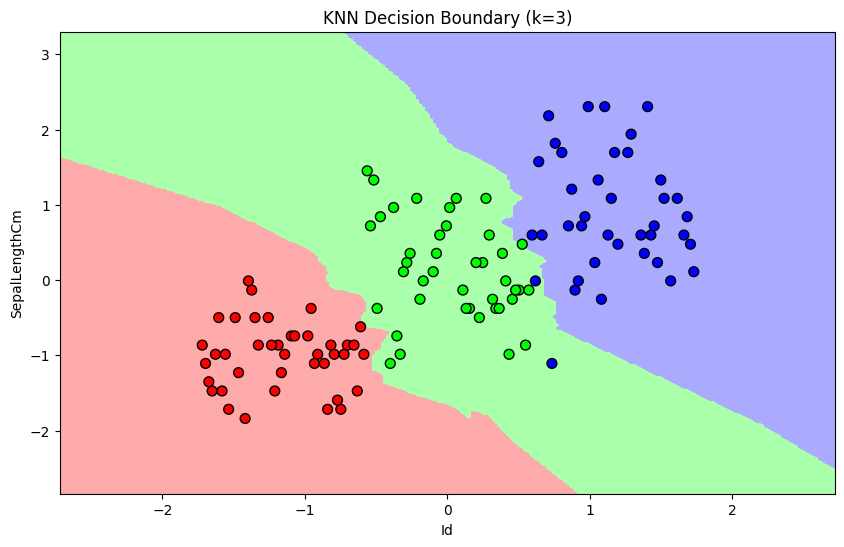

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = pd.read_csv('Iris.csv')
print("Columns in your dataset:", list(iris.columns))

# Replace with the actual label column name after checking above output
label_col = 'species'  # CHANGE this to your actual label column name

# Check if label_col exists in dataset
if label_col not in iris.columns:
    print(f"Warning: Column '{label_col}' not found in dataset. Using the last column as label instead.")
    label_col = iris.columns[-1]  # use last column as fallback


# Encode labels if the label column is categorical
if iris[label_col].dtype == object:
    label_encoder = LabelEncoder()
    iris[label_col] = label_encoder.fit_transform(iris[label_col])

# Use first two features (adjust if needed)
X = iris.iloc[:, :2].values
y = iris[label_col].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different K values and evaluate
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'K={k} Accuracy: {acc:.3f}')
    print(f'Confusion Matrix:\n{cm}\n')

# Visualize decision boundaries for K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

h = .02  # mesh step size
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=50)
plt.title("KNN Decision Boundary (k=3)")
plt.xlabel(iris.columns[0])
plt.ylabel(iris.columns[1])
plt.show()
